## Tensorflow for drift diffusion 2D

tensor for the transition
vector for the state 



In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
eps = 0.001
N = 100
M = 10000

In [3]:
sess = tf.InteractiveSession()

In [4]:
# define initial state matrix 
a_init = np.zeros((1, N, N, 1), dtype=np.float32)
a_init[:, int(N / 2), int(N / 2), :] = 10.
# define state matrix as tensorflow variable with initial value 
a = tf.Variable(a_init, name='state_mat')

In [5]:
kernel = tf.constant(np.array([[0, 1., 0], [1, -4., 1], [0, 1., 0]], dtype=np.float32)[:, :, np.newaxis, np.newaxis], name='kernel')
conv = tf.nn.conv2d(a, kernel, strides=[1, 1, 1, 1], padding='SAME')

In [6]:
update = tf.assign_add(a, eps * conv)

In [7]:
# Initialize state to initial conditions
tf.global_variables_initializer().run()

In [8]:
# Initialize state to initial conditions
tf.global_variables_initializer().run()
t0 = time.time()
# run the loop
for i in range(M):
    sess.run(update)
td = time.time() - t0
td


14.548137903213501

In [9]:
#summary_writer = tf.summary.FileWriter('logs', sess.graph)

In [10]:
result = a.eval().squeeze()

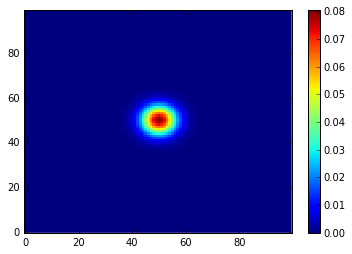

In [11]:
im =plt.imshow(result, origin='lower', aspect='auto', interpolation='None')
plt.colorbar()
im.set_clim()


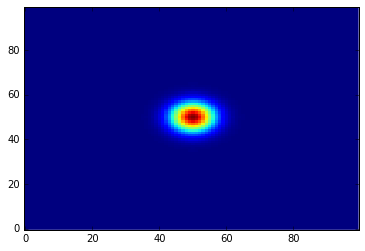

In [21]:
#Create nice movie :) [Quite slow.. ]

from matplotlib import animation, rc
from IPython.display import HTML

#initialize
AA=[]
tf.global_variables_initializer().run()
# run the loop
for i in range(M):
    sess.run(update)
    AA.append(a.eval().squeeze())

#Initialize figure    
fig, ax = plt.subplots()
ims = []

def f_Mat(i):
    return AA[i]

im2 = plt.imshow(f_Mat(i), animated=True, origin='lower', aspect='auto', interpolation='None')

def updatefig(i):
    im2.set_array(f_Mat(i))
    return im2,

# Requires ffmpeg, to create the video..
ani = animation.FuncAnimation(fig, updatefig, interval=1, frames=len(AA), blit=True)
HTML(ani.to_html5_video())

